In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Importa os dados

In [14]:
# importa os dados
dados = pd.read_csv('./data/dados_agachamento_discretizado.csv')
# mostra a estrutura dos dados
dados.head()

,index,angulo pico joelho,angulo pico quadril,base
0,bipodal_1.csv,119.860080,139.310524,Bipodal
1,bipodal_10.csv,120.259486,139.628018,Bipodal
2,bipodal_2.csv,120.397792,140.156718,Bipodal
3,bipodal_3.csv,120.165837,139.805063,Bipodal
4,bipodal_4.csv,119.768892,140.085221,Bipodal


# Avalia diferenças entre bases

Unilateral: 90.13910150228226
Bilateral: 119.99986540895517


TtestResult(statistic=-147.13085629261184, pvalue=3.4992387076732076e-29, df=18.0)

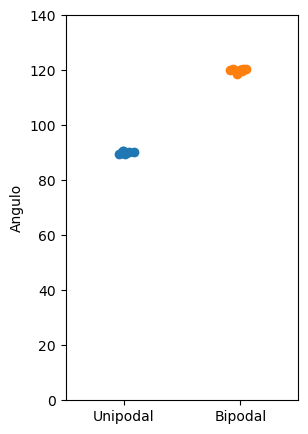

In [59]:
# cria um agrupador para facilitar as analises
agrupador = dados.groupby('base')

# recupera os vetores para analise
vetor_uni = agrupador.get_group('Unipodal')['angulo pico joelho']
vetor_bi = agrupador.get_group('Bipodal')['angulo pico joelho']

# apresenta os dados
print(f"Unilateral: {vetor_uni.mean()}")
print(f"Bilateral: {vetor_bi.mean()}")


# apresenta graficamente
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)

# insere os elementos graficos
ax.plot(np.random.normal(0,0.05,len(vetor_uni)),vetor_uni,marker='o',lw=False)
ax.plot(np.random.normal(1,0.05,len(vetor_bi)),vetor_bi,marker='o',lw=False)

# ajusta esteticos
ax.set_ylim(0,140)
ax.set_xticks([0,1],['Unipodal','Bipodal'])
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('Angulo')

# faz um teste de hipotese
stats.ttest_ind(vetor_uni,vetor_bi)